[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/seoul-bike-analysis/blob/master/seoul-bike-eda.ipynb)

# 서울특별시 공공자전거 따릉이 대여이력 분석
* [miningful/seoulbike: 따릉이 따세권EDA](https://github.com/miningful/seoulbike)에서 흥미를 얻어 분석을 시작하게 됨

## 데이터 출처 :
* 서울특별시 공공자전거 대여이력 정보
http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-15182&srvType=F&serviceKind=1&currentPageNo=1

* `(이달의주요공개정보)_서울_공공자전거(따릉이)_이용현황 자료(161021).xlsx (1.24MB)`
https://opengov.seoul.go.kr/anspruch/10045476


## 관련자료 
* [(석간) 서울시 따릉이 회원 62만 돌파 출 퇴근시간 38% 집중](http://spp.seoul.go.kr/main/news/news_report.jsp#view/253821)
* [공공자전거 따릉이 인기 따라 '따세권' 형성…소외지역도 :: 공감언론 뉴시스통신사 ::](http://www.newsis.com/view/?id=NISX20180706_0000356247&cID=10201&pID=10200)
* [서울특별시 빅데이터 캠퍼스 > 분석결과/사례공유 > 서울시 분석사례 > 서울시 자전거 이동경로 분석](https://bigdata.seoul.go.kr/noti/selectNoti.do?r_id=P430&bbs_seq=229&sch_type=&sch_text=&currentPage=1)
* [따릉이 편리하게 이용하기 위한 14가지 | 서울시 정보소통광장(정보공개)](https://opengov.seoul.go.kr/mediahub/15085803)

In [1]:
# 노트북이 간결해 보이도록 경고 문구는 출력되지 않도록 함
# 프로그래밍에 익숙하다면 경고 문구도 출력해서 보도록 한다. 
# 하지만 익숙하지 않다면 당황하지 않기 위해 경고 메시지는 찍히지 않도록 한다.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 사용할 도구 가져오기

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

### 시각화 도구 설정

In [3]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
# Window 의 한글 폰트 설정
# plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
plt.rc('font', family='AppleGothic') 
plt.rc('axes', unicode_minus=False)

set_matplotlib_formats('retina')


# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

## Colab 에서 실행을 위한 코드

* https://colab.research.google.com/github/corazzon/seoul-bike-analysis/blob/master/seoul-bike-eda.ipynb
* 아래의 코드는 google colaboratory 에서 실행을 위한 코드로 로컬 아나콘다에서는 주석처리한다.
* google colaboratory 에서는 주석을 풀고 폰트 설정과 csv 파일을 불러온다.

In [4]:
# # 나눔고딕 설치
# !apt -qq -y install fonts-nanum > /dev/null

# import matplotlib.font_manager as fm

# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)
# fm._rebuild()

# # 그래프에 retina display 적용
# %config InlineBackend.figure_format = 'retina'

# # Colab 의 한글 폰트 설정
# plt.rc('font', family='NanumBarunGothic') 

In [5]:
# # 구글 드라이브에서 csv 파일을 읽어오기 위해 gauth 인증을 한다.
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # PyDrive client 인증
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [6]:
# # 공유 가능한 링크로 파일 가져오기 - 대여정보
# url ='https://drive.google.com/open?id=1YCIUZohmLJCVMtBhYpZf5aVnYGJC1USn'
# id = url.split('=')[1]
# print(id)
# downloaded = drive.CreateFile({'id':id}) 
# # data 폴더에 파일을 관리하며, 폴더가 없다면 만들어서 파일을 관리하도록 한다.
# %mkdir data
# downloaded.GetContentFile('data/seoul-bike-2016.csv')  

In [7]:
# # 공유 가능한 링크로 파일 가져오기 - 대여소 정보
# url ='https://drive.google.com/open?id=1PbU3obWSNc7ADD2sAF2Anhb9HYH8JsDL'
# id = url.split('=')[1]
# print(id)
# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile('data/seoul_bike_station.csv')  

## 데이터 불러오기
* 서울시정보소통광장에서 다운로드 받은 csv파일과 크롤링해온 대여소 정보가 있다.
* 이 노트북에서는 전체 데이터 중 일부 데이터만을 사용해서 특정 시기의 데이터만 분석해 보고 점점 더 큰 데이터를 로드해서 분석한다.

In [8]:
# df = pd.read_csv('data/서울특별시 공공자전거 대여이력 정보_2018년_2분기_4.csv', encoding='cp949')
# 2018년 2분기까지의 데이터를 보고 싶다면 아래 파일을 불러온다.
%time df = pd.read_csv('data/seoul-bike-2018.csv', low_memory=False)
df.shape

CPU times: user 28.3 s, sys: 7.56 s, total: 35.9 s
Wall time: 37.9 s


(9988088, 11)

## 데이터 미리보기 및 요약하기
* head와 tail을 통해 데이터 미리보기를 해볼 수 있다.
* head는 데이터의 윗부분을 tail은 데이터의 하단부를 미리보기 해준다. 
* 괄호안에 숫자를 넣어주면 해당 숫자만큼의 데이터를 가져온다. 기본값은 5이다.

In [9]:
df.head()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M)
0,SPB-02041,2018-01-01 00:00:10,227,양평2나들목 보행통로 입구,9,2018-01-01 00:04:03,227,양평2나들목 보행통로 입구,9,3,50.0
1,SPB-03796,2018-01-01 00:00:42,2219,"고속터미널역 8-1번, 8-2번 출구 사이",15,2018-01-01 00:25:41,3511,응봉역 1번출구,9,24,7670.0
2,SPB-02402,2018-01-01 00:00:58,567,성수역 2번출구 앞,13,2018-01-01 00:09:33,3506,영동대교 북단,2,8,1390.0
3,SPB-01564,2018-01-01 00:01:02,568,청계8가사거리 부근,5,2018-01-01 00:10:13,521,왕십리역 11번 출구 앞,9,8,1820.0
4,SPB-05713,2018-01-01 00:01:03,361,동묘앞역 1번출구 뒤,4,2018-01-01 00:06:18,383,신당역 12번 출구 뒤,8,4,850.0


In [10]:
df.tail()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M)
9988083,SPB-14113,2018-12-31 23:33:24,1452,겸재교 진입부,6,2019-01-01 01:30:18,1452,겸재교 진입부,7,116,1410.0
9988084,SPB-17654,2018-12-31 16:47:34,128,신촌역(2호선) 1번출구 옆,4,2019-01-01 01:43:48,101,(구)합정동 주민센터,2,535,3780.0
9988085,SPB-03920,2018-12-31 15:28:43,1623,노원 구민회관,2,2019-01-01 02:39:06,1673,노원역?5번출구,1,670,1980.0
9988086,SPB-08305,2018-12-31 23:21:42,113,홍대입구역 2번출구 앞,7,2019-01-01 06:36:48,170,가재울 뉴타운 주유소 옆,7,177,2480.0
9988087,SPB-18723,2018-12-31 19:33:03,238,제2구민체육센타 앞,8,2019-01-01 14:56:36,265,영등포유통상가 사거리,11,1,0.0


* info를 사용하면 해당 데이터의 요약정보를 볼 수 있다.
* 데이터의 갯수와 데이터의 타입, 크기 등을 볼 수 있다.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9988088 entries, 0 to 9988087
Data columns (total 11 columns):
 #   Column   Dtype  
---  ------   -----  
 0   자전거번호    object 
 1   대여일시     object 
 2   대여대여소번호  object 
 3   대여대여소명   object 
 4   대여거치대    int64  
 5   반납일시     object 
 6   반납대여소번호  object 
 7   반납대여소명   object 
 8   반납거치대    int64  
 9   이용시간(분)  int64  
 10  이용거리(M)  float64
dtypes: float64(1), int64(3), object(7)
memory usage: 838.2+ MB


In [12]:
df[["이용시간(분)", "이용거리(M)"]].describe()

,이용시간(분),이용거리(M)
count,9.988088e+06,9.988088e+06
mean,2.746007e+01,4.528782e+03
std,3.054006e+01,9.669448e+03
min,0.000000e+00,0.000000e+00
25%,8.000000e+00,1.210000e+03
50%,1.600000e+01,2.290000e+03
75%,3.700000e+01,4.810000e+03
max,5.940000e+03,2.559900e+05


In [13]:
df.describe(include=np.object)

,자전거번호,대여일시,대여대여소번호,대여대여소명,반납일시,반납대여소번호,반납대여소명
count,9988088,9988088,9988088,9988088,9988088,9988088,9988088
unique,18219,7517752,1540,2787,7549985,1545,2793
top,SPB-12694,2018-10-09 16:25:34,207,여의나루역 1번출구 앞,2018-10-09 16:27:08,502,홍대입구역 2번출구 앞
freq,1253,207,68632,38927,57,66099,39222


## 분석을 위한 전처리
* 위에서 데이터를 미리보기 했을 때 컬럼과 데이터에 불필요한 홑따옴표가 포함되어 있다.
* 전처리를 통해 제거해 준다.
* object 타입의 데이터에는 모두 홑따옴표가 들어가 있다. 따라서 object 데이터 타입이라면 홑따옴표를 제거해 주도록 한다.
* 아래 코드는 데이터를 병합하면서 처리했다. 병합 전의 데이터를 불러와서 전처리 하고자 할 때는 주석을 풀고 사용하면 된다.

In [14]:
# 컬럼에 있는 '를 제거한다.
# df.columns = df.columns.str.strip("'")

In [15]:
# 일부 데이터에 불필요하게 '가 들어가 있다. 스트링 타입으로 되어있는 데이터에서 '을 제거하자.
# 2018년 전체 데이터를 모아놓은 csv에서는 미리 제거해서 넣어두었다.
# 다른 파일을 가져와서 분석할 때 아래 코드를 활용한다.
# df = df.apply(lambda x: x.str.strip("'") if x.dtype == np.dtype('object') else x)

# 다음의 방법으로 제거할 수도 있다.
# df.iloc[:, :4] = df.iloc[:, :4].apply(lambda x: x.str.strip("'"))
# df.iloc[:, 5:8] = df.iloc[:, 5:8].apply(lambda x: x.str.strip("'"))

## 결측치 보기

In [16]:
df.isnull().sum()

자전거번호      0
대여일시       0
대여대여소번호    0
대여대여소명     0
대여거치대      0
반납일시       0
반납대여소번호    0
반납대여소명     0
반납거치대      0
이용시간(분)    0
이용거리(M)    0
dtype: int64

## 결측치 시각화 하기
* missingno는 별도로 설치해야 하는 시각화 도구 입니다. 결측치를 시각화해서 볼 수 있다.

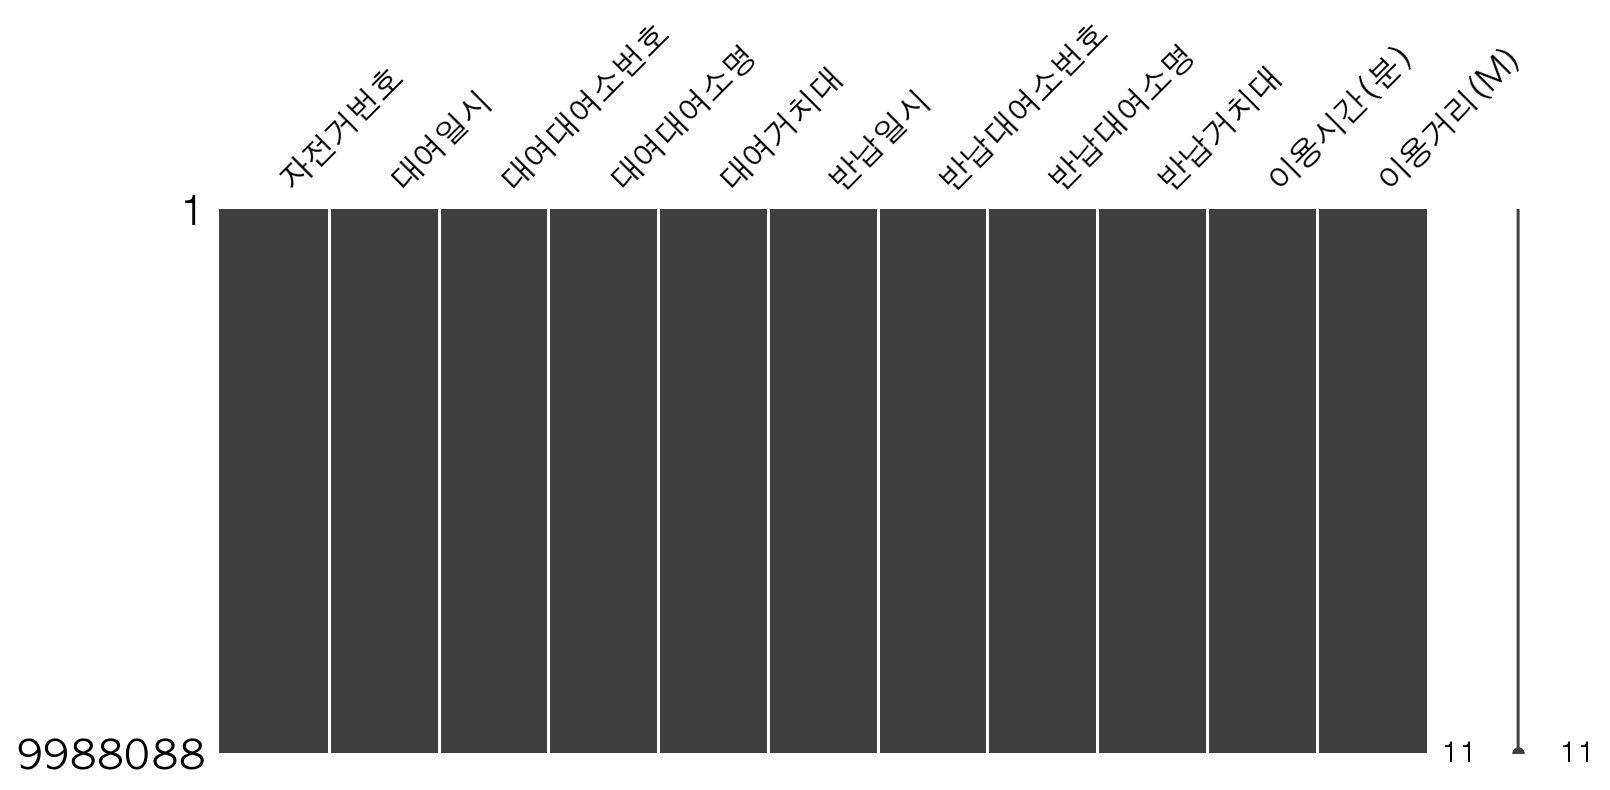

In [17]:
# 아나콘다에서 missingno 설치가 안 되어 있다면 다음의 명령으로 설치합니다.
# https://anaconda.org/conda-forge/missingno
# conda install -c conda-forge missingno

# 결측치 보기
import missingno as msno

msno.matrix(df, figsize=(12,5))

## 대여소별 대여|반납 현황

In [18]:
# unique 는 중복을 제거한 데이터를 집계합니다. 
# nunique는 중복을 제거한 데이터의 수를 세어줍니다.
# 대여와 반납이 되는 대여소를 찾습니다.
print('# 대여소 수')
print('대여 대여소: ', df['대여대여소번호'].nunique())
print('반납 대여소: ', df['반납대여소번호'].nunique())

# 대여소 수
대여 대여소:  1540
반납 대여소:  1545


In [19]:
df['대여대여소번호'].value_counts().tail(10)

436     11
9998    10
3539     9
1200     8
2621     8
2612     4
969      3
위트콤      3
1992     1
1687     1
Name: 대여대여소번호, dtype: int64

* 대여 대여소번호에 상암센터 정비실과 위트콤 같은 숫자가 아닌 곳들이 있음

In [20]:
# 대여량이 많은 상위 대여소
df['대여대여소명'].value_counts().head(10)

여의나루역 1번출구 앞               38927
뚝섬유원지역 1번출구 앞              33694
홍대입구역 2번출구 앞               31330
 여의나루역 1번출구 앞              29705
롯데월드타워(잠실역2번출구 쪽)          27290
봉림교 교통섬                    24929
고속터미널역 8-1번, 8-2번 출구 사이    24673
안암로터리 버스정류장 앞              23966
 뚝섬유원지역 1번출구 앞             23141
건국대학교 (입학정보관)              23113
Name: 대여대여소명, dtype: int64

In [21]:
# 반납량이 많은 상위 대여소
df['반납대여소명'].value_counts().head(10)

홍대입구역 2번출구 앞               39222
뚝섬유원지역 1번출구 앞              38784
여의나루역 1번출구 앞               36310
 여의나루역 1번출구 앞              28969
롯데월드타워(잠실역2번출구 쪽)          27476
 뚝섬유원지역 1번출구 앞             27315
 홍대입구역 2번출구 앞              26282
안암로터리 버스정류장 앞              25830
고속터미널역 8-1번, 8-2번 출구 사이    25750
봉림교 교통섬                    25322
Name: 반납대여소명, dtype: int64

1. 대여반납이 많은 상위 대여소인 홍대입구역, 여의나루역, 뚝섬유원지, 롯데월드타워는 모두 강이나 호수를 인근에 두고 있다. 
2. 성대입구나 안암로터리 버스정류장은 대학가 인근이다.

In [22]:
# 평균 이용거리가 긴 상위 대여소
df.groupby(['대여대여소명'])['이용거리(M)'].mean().reset_index().sort_values(
    by='이용거리(M)', ascending=False).head(10)

,대여대여소명,이용거리(M)
1463,구룡마을 입구 (래미안블레스티지 아파트),10712.162162
353,동작역 5번출구 동작주차공원,9572.755040
330,독산보도육교 앞 자전거 보관소,9555.473776
1651,독산보도육교 앞 자전거 보관소,9469.073822
333,독산주공 14단지 버스정류소,9338.485915
2783,흑석역 1번출구,9302.960016
1364,개화동상사마을종점 버스정류장,9192.646421
2388,옥수역 3번출구,9144.145576
1679,동작역 5번출구 동작주차공원,9127.669017
1237,흑석역 1번출구,9102.599215


In [23]:
# 평균 이동거리가 긴 구룡마을 입구에서 대여한 자전거의 반납 장소를 본다.
df.loc[df["대여대여소명"] == "구룡마을 입구 (래미안블레스티지 아파트)", "반납대여소명"]

7716069                                    사당역 7번출구쪽
7731914                                   석촌호수 서호사거리
7768644                                      대치역 사거리
7768730                                      대치역 사거리
7774315                                   수서역 1번출구 앞
7851057                                       KT선릉타워
7901940                                    사당역 7번출구쪽
7976609                                더케이호텔 입구(양재2)
8055878                                   청계8가사거리 부근
8088834                           삼호물산버스정류장(23370) 옆
8103590                                3호선 매봉역 3번출구앞
8316916                                더케이호텔 입구(양재2)
8351577                                더케이호텔 입구(양재2)
8383086                                     한티역 3번출구
8385370                                더케이호텔 입구(양재2)
8430877    르네상스호텔사거리 역삼지하보도 3번출구 앞 (더 오번 빌딩 명동칼국수 앞)
8476732                                더케이호텔 입구(양재2)
8505528                                  대청역 1번출구  뒤
8514509                                더케이호텔 입

In [24]:
# 평균 이용거리가 긴 상위 반납대여소
df.groupby(['반납대여소명'])['이용거리(M)'].mean().reset_index().sort_values(
    by='이용거리(M)', ascending=False).head(10)

,반납대여소명,이용거리(M)
1465,구룡마을 입구 (래미안블레스티지 아파트),14026.071429
87,강일동 에너지 마루,9975.871560
1654,독산보도육교 앞 자전거 보관소,9783.870072
2448,위례24단지 꿈에그린아파트,9518.088235
353,동작역 5번출구 동작주차공원,9474.590164
2648,청계천 생태교실 앞,9316.815356
2392,옥수역 3번출구,9178.964111
2780,황금내근린공원,9142.023875
2019,서빙고동 주민센터 앞,9130.381705
330,독산보도육교 앞 자전거 보관소,9129.946913


In [25]:
# 평균 이용거리가 짧은 대여소
df.groupby(['대여대여소명'])['이용거리(M)'].mean().reset_index().sort_values(
    by='이용거리(M)', ascending=True).head()

,대여대여소명,이용거리(M)
2449,위트콤,0.000000
1454,구로구배드민턴실내체육관 앞,0.000000
2071,서울월드컵경기장 테스트,750.000000
1622,대흥역 1번출구,1328.888889
1737,마곡역 교차로(2번출구),1363.892617


In [26]:
# 평균 이용시간이 많은 상위 대여소
df.groupby(['대여대여소명'])['이용시간(분)'].mean().reset_index().sort_values(
    by='이용시간(분)', ascending=False).head()

,대여대여소명,이용시간(분)
1679,동작역 5번출구 동작주차공원,60.549564
353,동작역 5번출구 동작주차공원,60.006720
648,서울숲 관리사무소,57.964699
2044,서울숲 관리사무소,55.670209
649,서울숲 남문 버스정류소 옆,55.532017


In [27]:
# 평균 이용시간이 적은 상위 대여소
df.groupby(['대여대여소명'])['이용시간(분)'].mean().reset_index().sort_values(
    by='이용시간(분)', ascending=True).head()

,대여대여소명,이용시간(분)
1454,구로구배드민턴실내체육관 앞,2.000000
2463,은평뉴타운 상림마을 13단지,8.572816
1729,마곡나루역 5번출구 뒤편,9.059561
2459,은평 지웰테라스,9.333333
2401,왕십리자이아파트 후문(삼거리),9.757143


## 시계열 데이터 보기
* Datetime 활용하기 : [pandas.DatetimeIndex — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/version/0.24.2/reference/api/pandas.DatetimeIndex.html)

In [28]:
# 날짜와 시간이 object 타입이다.
# 연, 월, 일, 시, 분, 초, 요일 등의 정보를 가져오기 위해 데이터의 타입을 변경한다.
df['대여일시'] = pd.to_datetime(df['대여일시'])
df['반납일시'] = pd.to_datetime(df['반납일시'])
df.dtypes

자전거번호              object
대여일시       datetime64[ns]
대여대여소번호            object
대여대여소명             object
대여거치대               int64
반납일시       datetime64[ns]
반납대여소번호            object
반납대여소명             object
반납거치대               int64
이용시간(분)             int64
이용거리(M)           float64
dtype: object

In [29]:
df['대여년월일'] = df['대여일시'].dt.date
df['반납년월일'] = df['반납일시'].dt.date
df['대여년'] = df['대여일시'].dt.year
df['대여월'] = df['대여일시'].dt.month
df['대여일'] = df['대여일시'].dt.day
df['대여시'] = df['대여일시'].dt.hour
df['대여분'] = df['대여일시'].dt.minute
df['대여요일'] = df['대여일시'].dt.dayofweek
df.columns

Index(['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간(분)', '이용거리(M)', '대여년월일', '반납년월일', '대여년', '대여월',
       '대여일', '대여시', '대여분', '대여요일'],
      dtype='object')

In [30]:
df['반납년월일'] = df['반납일시'].dt.date
df['반납년월일'] = df['반납일시'].dt.date
df['반납년'] = df['반납일시'].dt.year
df['반납월'] = df['반납일시'].dt.month
df['반납일'] = df['반납일시'].dt.day
df['반납시'] = df['반납일시'].dt.hour
df['반납분'] = df['반납일시'].dt.minute
df['반납요일'] = df['반납일시'].dt.dayofweek
df.columns

Index(['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간(분)', '이용거리(M)', '대여년월일', '반납년월일', '대여년', '대여월',
       '대여일', '대여시', '대여분', '대여요일', '반납년', '반납월', '반납일', '반납시', '반납분', '반납요일'],
      dtype='object')

In [31]:
df.head()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),...,대여일,대여시,대여분,대여요일,반납년,반납월,반납일,반납시,반납분,반납요일
0,SPB-02041,2018-01-01 00:00:10,227,양평2나들목 보행통로 입구,9,2018-01-01 00:04:03,227,양평2나들목 보행통로 입구,9,3,...,1,0,0,0,2018,1,1,0,4,0
1,SPB-03796,2018-01-01 00:00:42,2219,"고속터미널역 8-1번, 8-2번 출구 사이",15,2018-01-01 00:25:41,3511,응봉역 1번출구,9,24,...,1,0,0,0,2018,1,1,0,25,0
2,SPB-02402,2018-01-01 00:00:58,567,성수역 2번출구 앞,13,2018-01-01 00:09:33,3506,영동대교 북단,2,8,...,1,0,0,0,2018,1,1,0,9,0
3,SPB-01564,2018-01-01 00:01:02,568,청계8가사거리 부근,5,2018-01-01 00:10:13,521,왕십리역 11번 출구 앞,9,8,...,1,0,1,0,2018,1,1,0,10,0
4,SPB-05713,2018-01-01 00:01:03,361,동묘앞역 1번출구 뒤,4,2018-01-01 00:06:18,383,신당역 12번 출구 뒤,8,4,...,1,0,1,0,2018,1,1,0,6,0


In [32]:
df_month_1 = df['대여월'].value_counts().reset_index()
df_month_1.columns = ['month', 'count']

df_month_1 = df_month_1.sort_values('month')
df_month_1['대여반납'] = '대여'
print(df_month_1.shape)

df_month_2 = df['반납월'].value_counts().reset_index()
df_month_2.columns = ['month', 'count']
df_month_2 = df_month_2.sort_values('month')
df_month_2['대여반납'] = '반납'
print(df_month_2.shape)

df_month = pd.concat([df_month_1, df_month_2])
print(df_month.shape)
df_month.head()

(12, 3)
(12, 3)
(24, 3)


,month,count,대여반납
11,1,161859,대여
10,2,166337,대여
9,3,456538,대여
7,4,677878,대여
6,5,951446,대여


In [33]:
df_month_pivot =  df_month.pivot_table(index=['month'],
                                       columns=['대여반납'], 
                                       values='count', aggfunc=sum)
df_month_pivot

대여반납,대여,반납
month,,
1,161859,161899
2,166337,166372
3,456538,456123
4,677878,677636
5,951446,951349
6,1153163,1153386
7,1089882,1089621
8,1026093,1025615
9,1433642,1434374


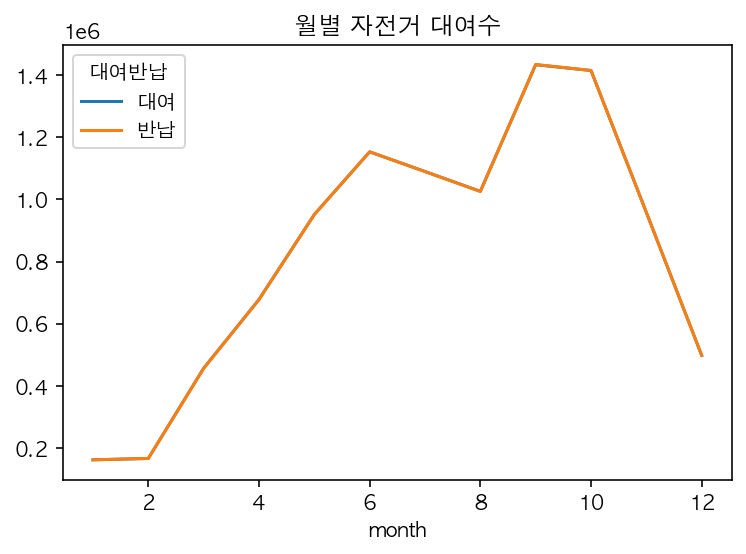

In [34]:
df_month_pivot.plot(title='월별 자전거 대여수', rot=0)

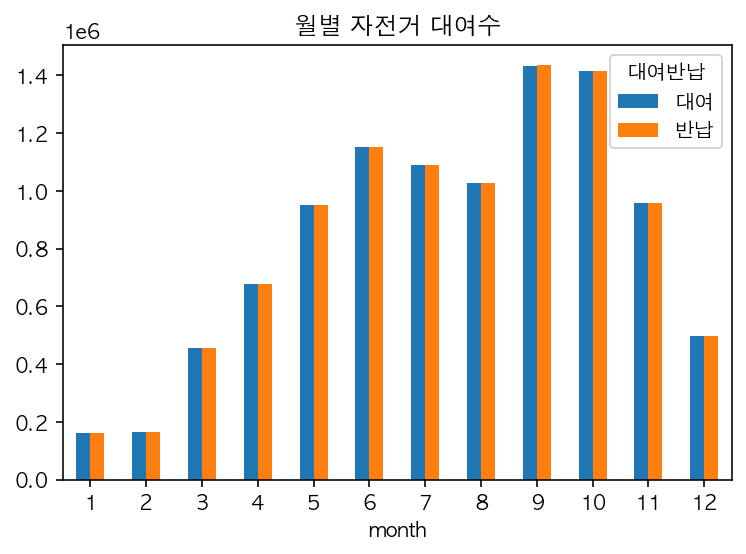

In [35]:
df_month_pivot.plot.bar(title='월별 자전거 대여수', rot=0)

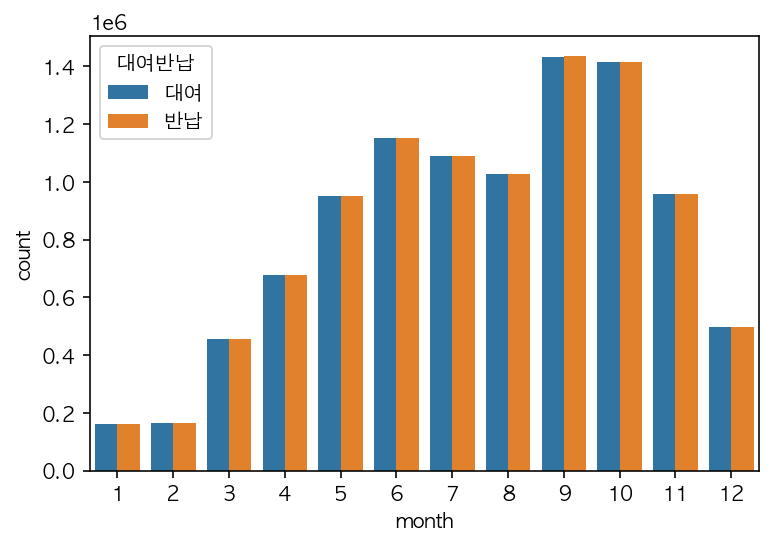

In [36]:
sns.barplot(data=df_month, x='month', y='count', hue='대여반납')

## 일자별 대여|반납 현황
* 날짜에 따라 대여|반납 횟수를 확인한다.

In [37]:
df_day_1 = df['대여일'].value_counts().reset_index()
df_day_1.columns = ['day', 'count']

df_day_1 = df_day_1.sort_values('day')
df_day_1['대여반납'] = '대여'
print(df_day_1.shape)

df_day_2 = df['반납일'].value_counts().reset_index()
df_day_2.columns = ['day', 'count']
df_day_2 = df_day_2.sort_values('day')
df_day_2['대여반납'] = '반납'
print(df_day_2.shape)

df_day = pd.concat([df_day_1, df_day_2])
print(df_day.shape)
df_day.head()

(31, 3)
(31, 3)
(62, 3)


,day,count,대여반납
22,1,310937,대여
23,2,310000,대여
14,3,322023,대여
2,4,360018,대여
26,5,299382,대여


In [38]:
df_day_pivot =  df_day.pivot_table(index=['day'],
                                       columns=['대여반납'], 
                                       values='count', aggfunc=sum)
df_day_pivot.head()

대여반납,대여,반납
day,,
1,310937,311076
2,310000,309962
3,322023,322562
4,360018,358792
5,299382,300137


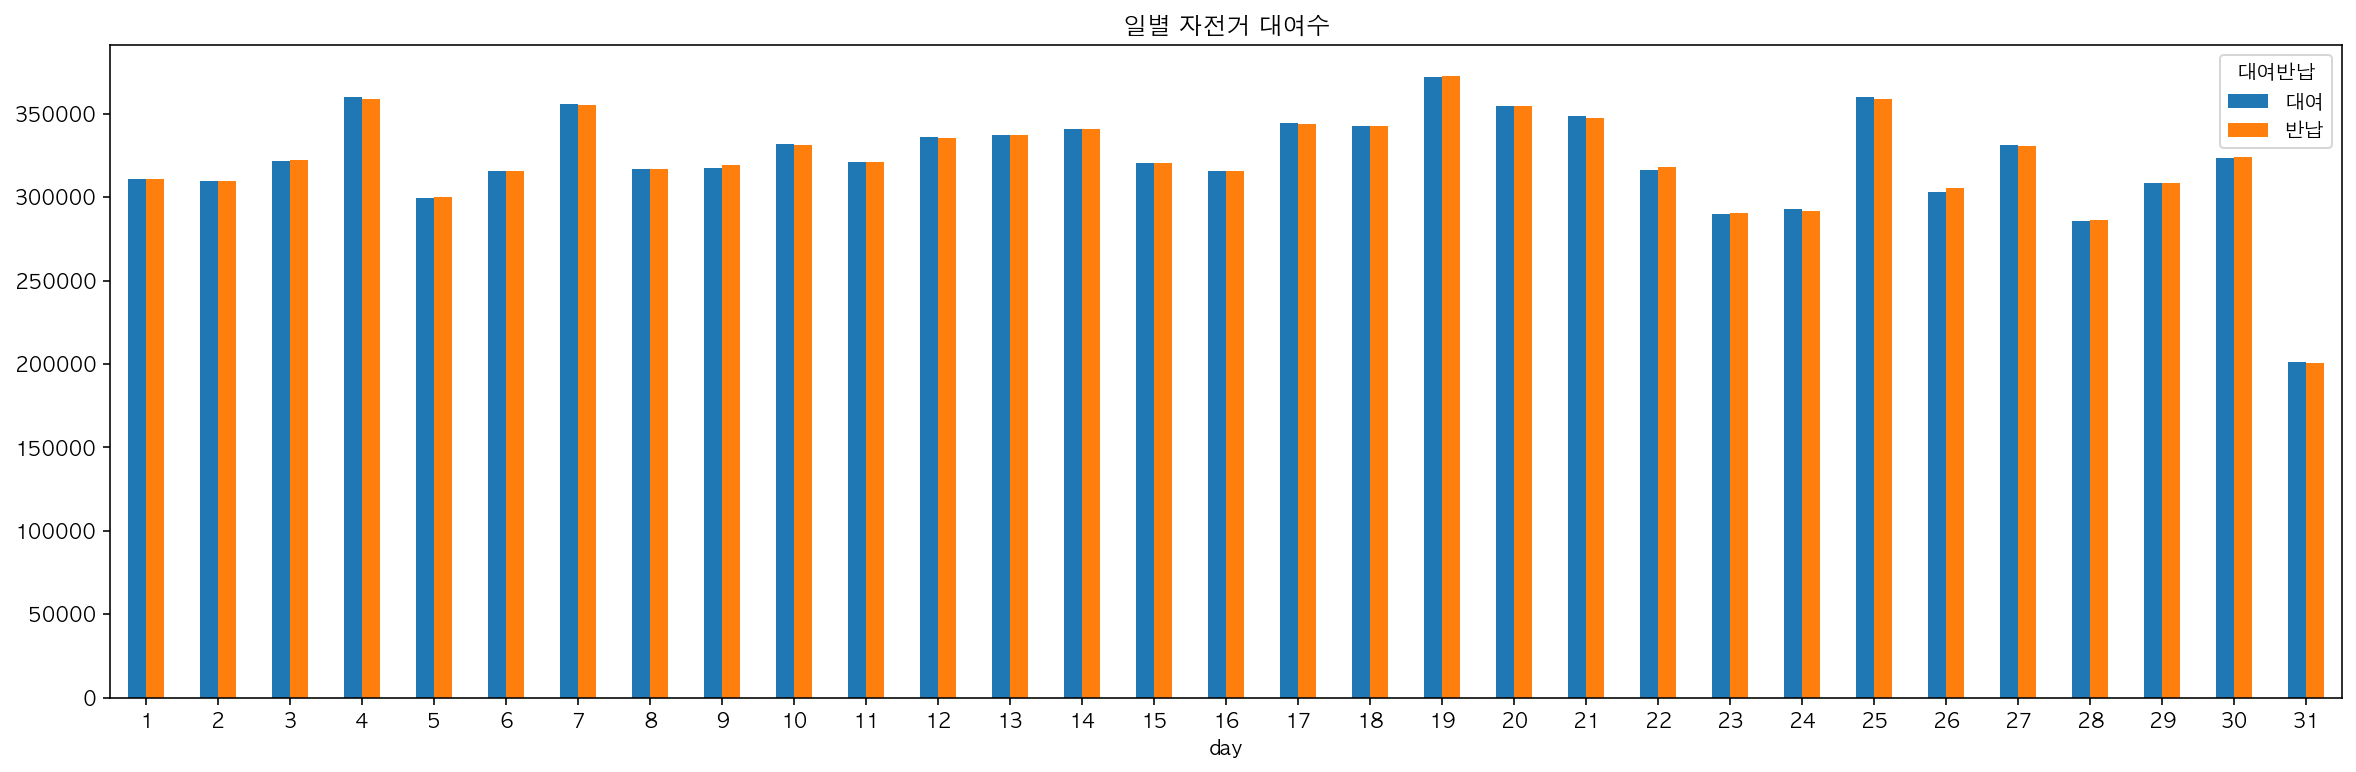

In [39]:
df_day_pivot.plot.bar(title='일별 자전거 대여수', rot=0, figsize=(20, 6))

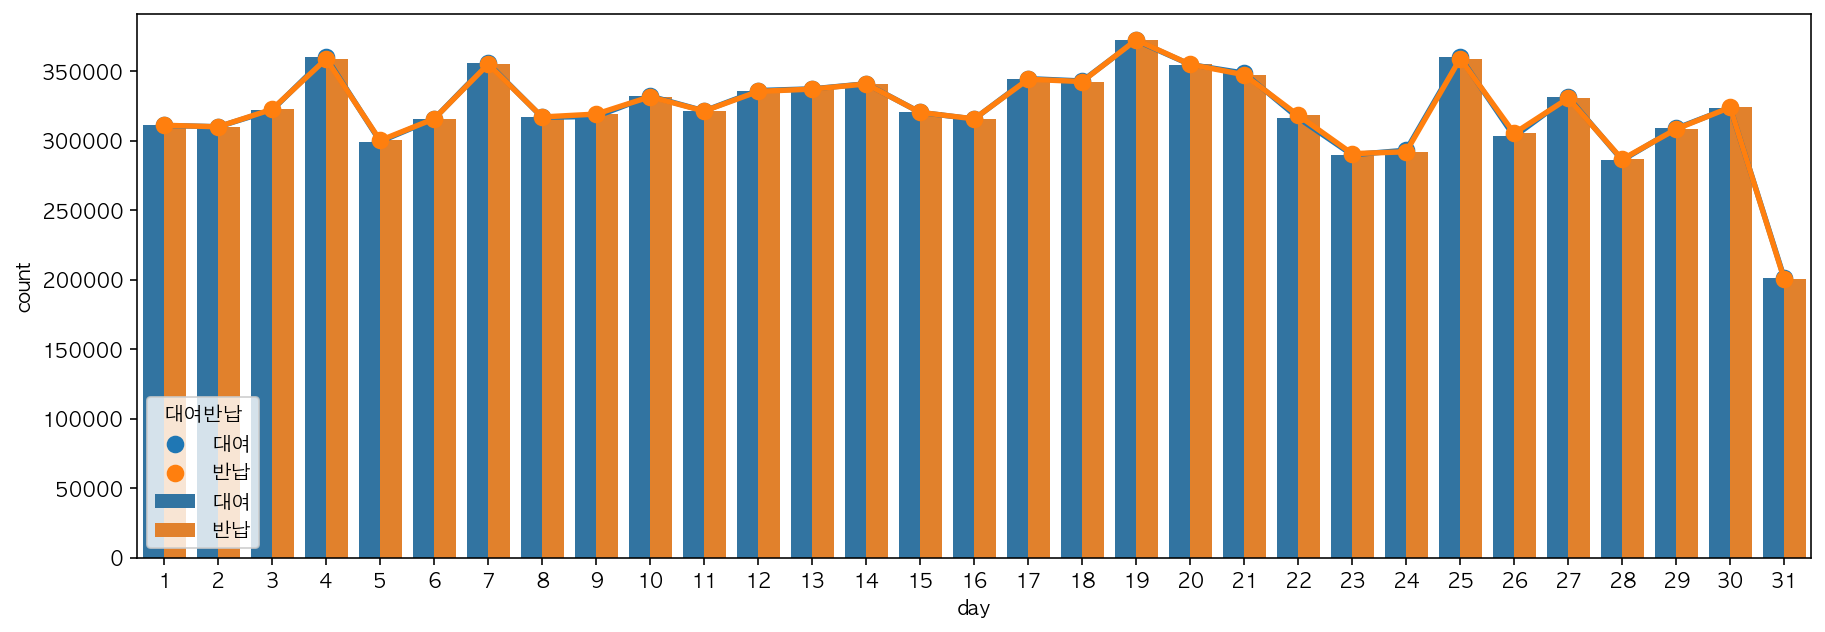

In [40]:
plt.figure(figsize=(15, 5))
sns.pointplot(data=df_day, x='day', y='count', hue='대여반납')
sns.barplot(data=df_day, x='day', y='count', hue='대여반납')

In [41]:
df_ymd_1 = df['대여년월일'].value_counts().reset_index()
df_ymd_1.columns = ['ymd', 'count']

df_ymd_1 = df_ymd_1.sort_values('ymd')
df_ymd_1['대여반납'] = '대여'
print(df_ymd_1.shape)

df_ymd_2 = df['반납년월일'].value_counts().reset_index()
df_ymd_2.columns = ['ymd', 'count']
df_ymd_2 = df_ymd_2.sort_values('ymd')
df_ymd_2['대여반납'] = '반납'
print(df_ymd_2.shape)

df_ymd = pd.concat([df_ymd_1, df_ymd_2])
print(df_ymd.shape)
df_ymd.head()

(365, 3)
(366, 3)
(731, 3)


,ymd,count,대여반납
333,2018-01-01,4881,대여
306,2018-01-02,7028,대여
305,2018-01-03,7036,대여
307,2018-01-04,7008,대여
300,2018-01-05,7590,대여


In [42]:
# 시간데이터로 표현하기 위해 타입을 바꿔준다.
df_ymd["ymd"] = pd.to_datetime(df_ymd["ymd"])
df_ymd["yymmdd"] = df_ymd["ymd"].dt.date

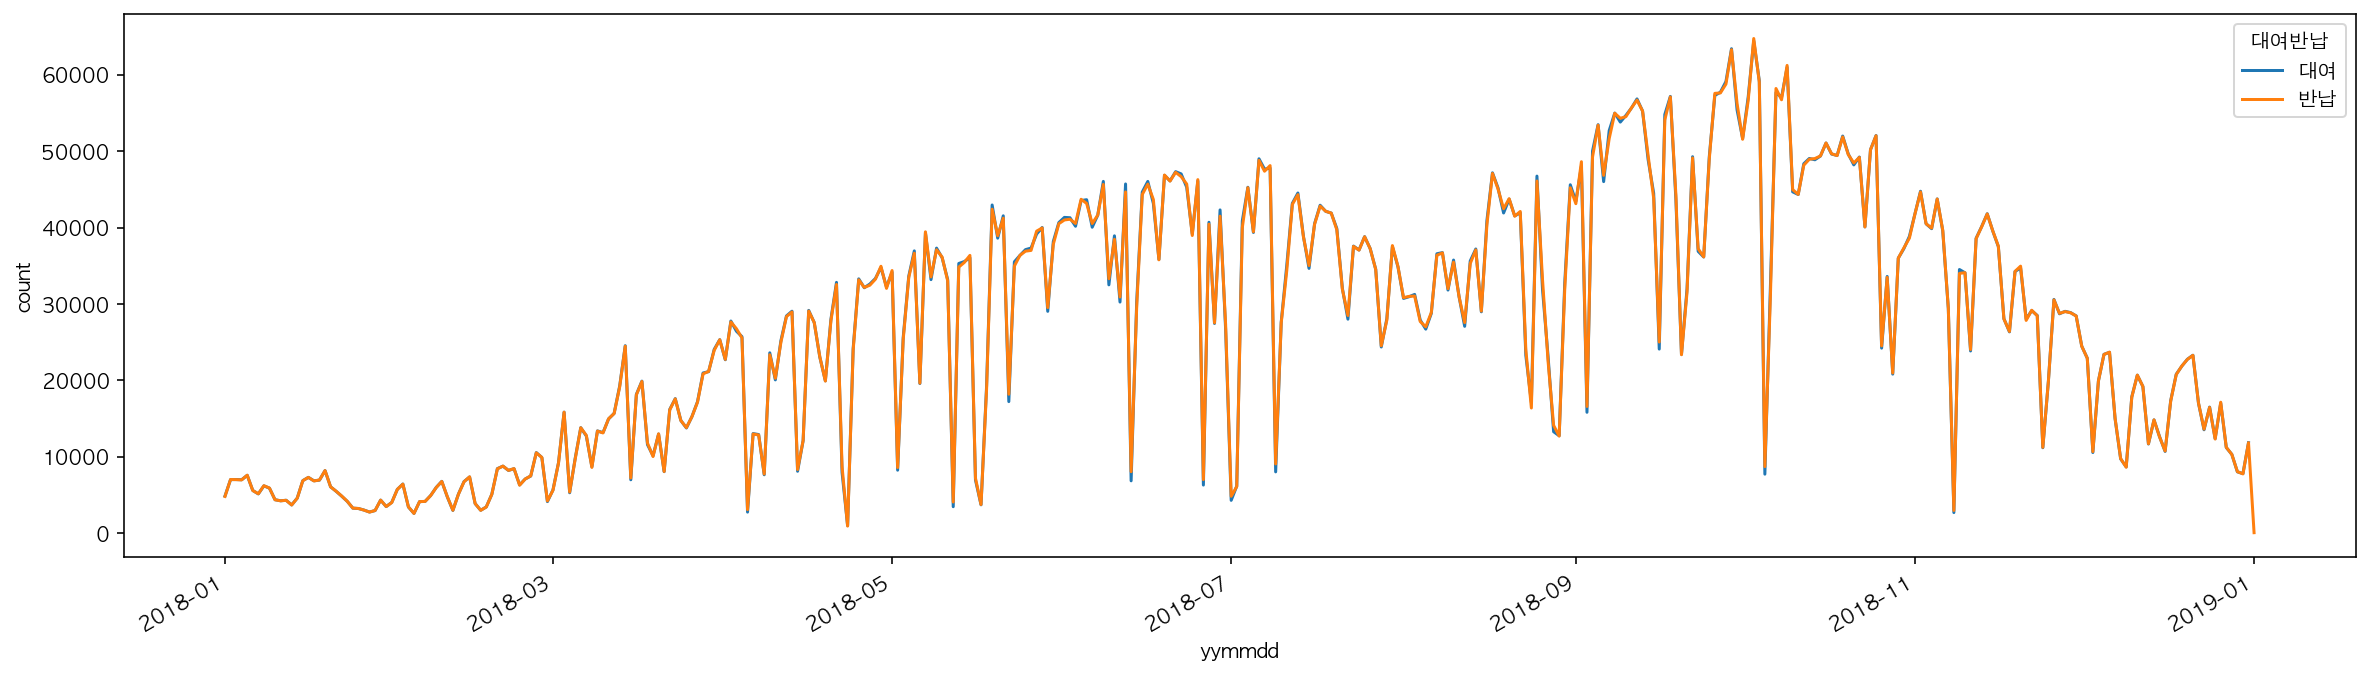

In [43]:
# 특정 기간동안의 따릉이 대여/반납 수
plt.figure(figsize=(20, 5))
plt.xticks(rotation=30, ha='right')
sns.lineplot(data=df_ymd, x='yymmdd', y='count', hue='대여반납')

In [44]:
# 슬라이싱으로 최근 데이터를 불러오기 위해 날짜 기준으로 정렬되도록 한다.
df_ymd = df_ymd.sort_values(by="ymd")
df_ymd.head()

,ymd,count,대여반납,yymmdd
333,2018-01-01,4881,대여,2018-01-01
335,2018-01-01,4827,반납,2018-01-01
308,2018-01-02,7041,반납,2018-01-02
306,2018-01-02,7028,대여,2018-01-02
310,2018-01-03,7027,반납,2018-01-03


* 일부 날짜의 데이터만 있다.
* 2018년 6월 데이터만 봤을 때 13, 26일에는 대여와 반납모두 적다.
* 26일의 일기예보를 보면 장맛비가 내린것을 확인해 볼 수 있다. https://www.youtube.com/watch?v=cYHC8iwfFyU

## 요일별 대여|반납 현황
* 대여|반납별로 어떤 요일에 주로 대여반납이 되는지 시각화해보기 위해 Tidy Data를 만든다.

In [45]:
df_dow_1 = df['대여요일'].value_counts().reset_index()
df_dow_1.columns = ['dayofweek', 'count']
df_dow_1 = df_dow_1.sort_values('dayofweek')
df_dow_1['대여반납'] = '대여'
print(df_dow_1.shape)

df_dow_2 = df['반납요일'].value_counts().reset_index()
df_dow_2.columns = ['dayofweek', 'count']
df_dow_2 = df_dow_2.sort_values('dayofweek')
df_dow_2['대여반납'] = '반납'
print(df_dow_2.shape)

df_dow = pd.concat([df_dow_1, df_dow_2]).reindex()
print(df_dow.shape)

(7, 3)
(7, 3)
(14, 3)


In [46]:
df_dow.head(3)

,dayofweek,count,대여반납
4,0,1419629,대여
0,1,1498863,대여
2,2,1465136,대여


In [47]:
df_dow.tail(3)

,dayofweek,count,대여반납
1,4,1475458,반납
3,5,1421873,반납
6,6,1310189,반납


In [48]:
weekday_map = {0:'월', 1:'화', 2:'수', 3:'목',
              4:'금', 5:'토', 6:'일'}
df_dow['weekday'] = df_dow['dayofweek'].apply(lambda x : weekday_map[x])
df_dow[['dayofweek', 'weekday']].head()

,dayofweek,weekday
4,0,월
0,1,화
2,2,수
5,3,목
1,4,금


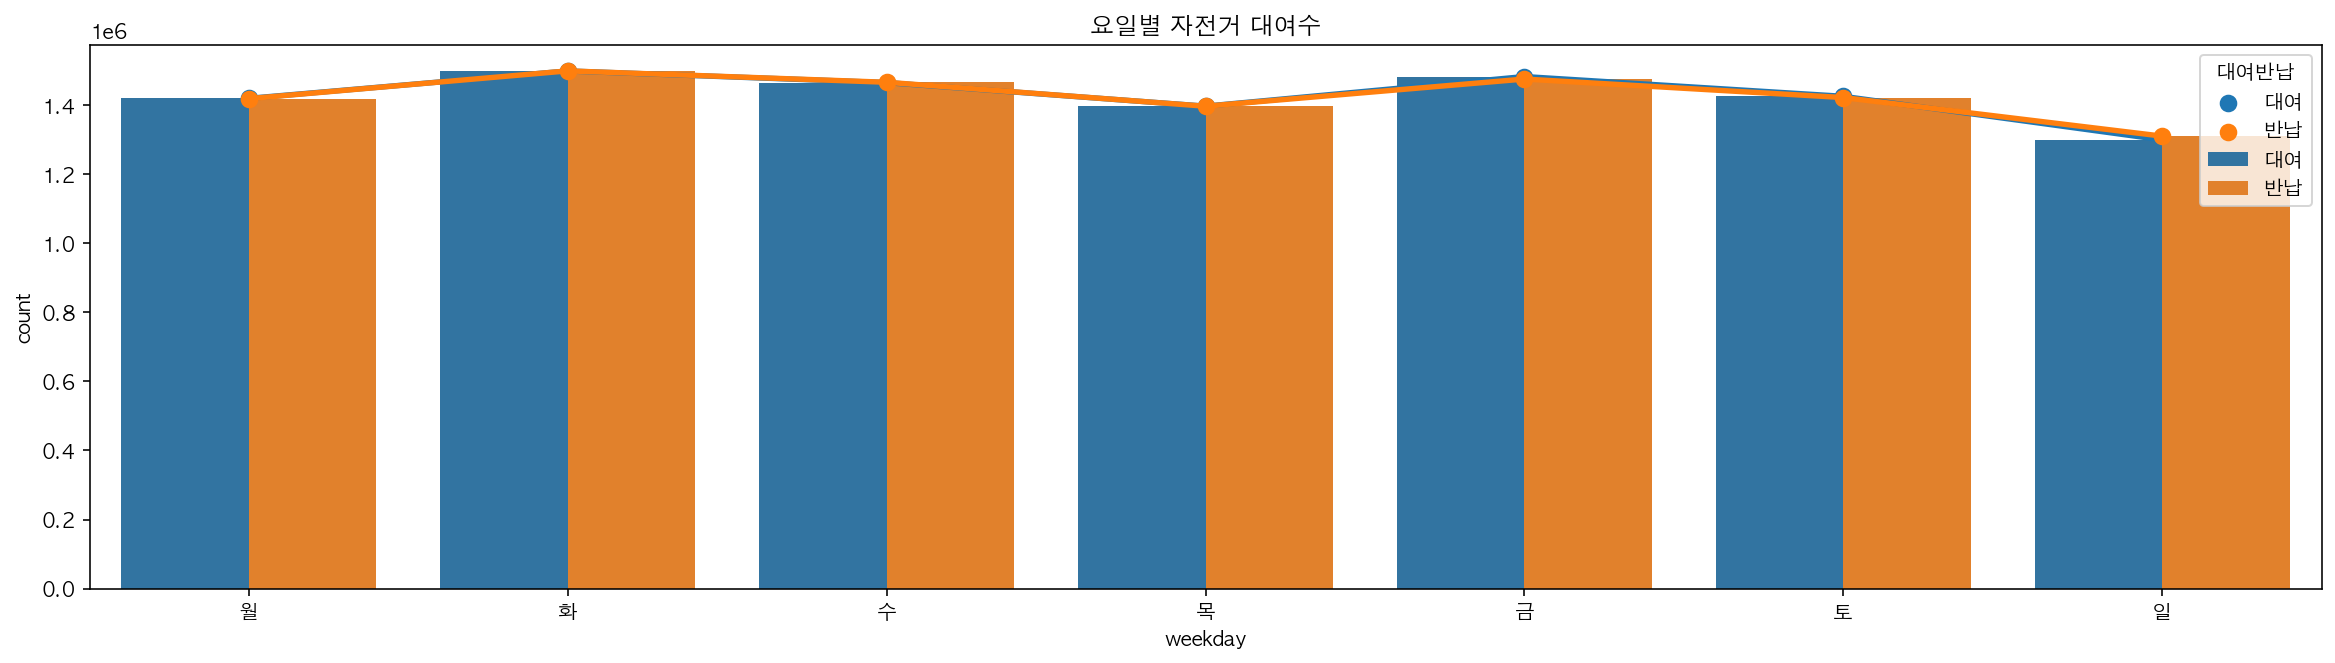

In [49]:
plt.figure(figsize=(20, 5))
plt.title("요일별 자전거 대여수")
sns.pointplot(data=df_dow, x="weekday", y="count", hue="대여반납")
sns.barplot(data=df_dow, x="weekday", y="count", hue="대여반납")

## 시간대별 대여|반납량

In [50]:
df_hour_1 = df['대여시'].value_counts().reset_index()
df_hour_1.columns = ['hour', 'count']
df_hour_1 = df_hour_1.sort_values('hour')
df_hour_1['대여반납'] = '대여'
df_hour_1.head()

df_hour_2 = df['반납시'].value_counts().reset_index()
df_hour_2.columns = ['hour', 'count']
df_hour_2 = df_hour_2.sort_values('hour')
df_hour_2['대여반납'] = '반납'
df_hour_2.head()

df_hour = pd.concat([df_hour_1, df_hour_2])
df_hour.head()

,hour,count,대여반납
14,0,323876,대여
18,1,251148,대여
19,2,174084,대여
21,3,115051,대여
22,4,72264,대여


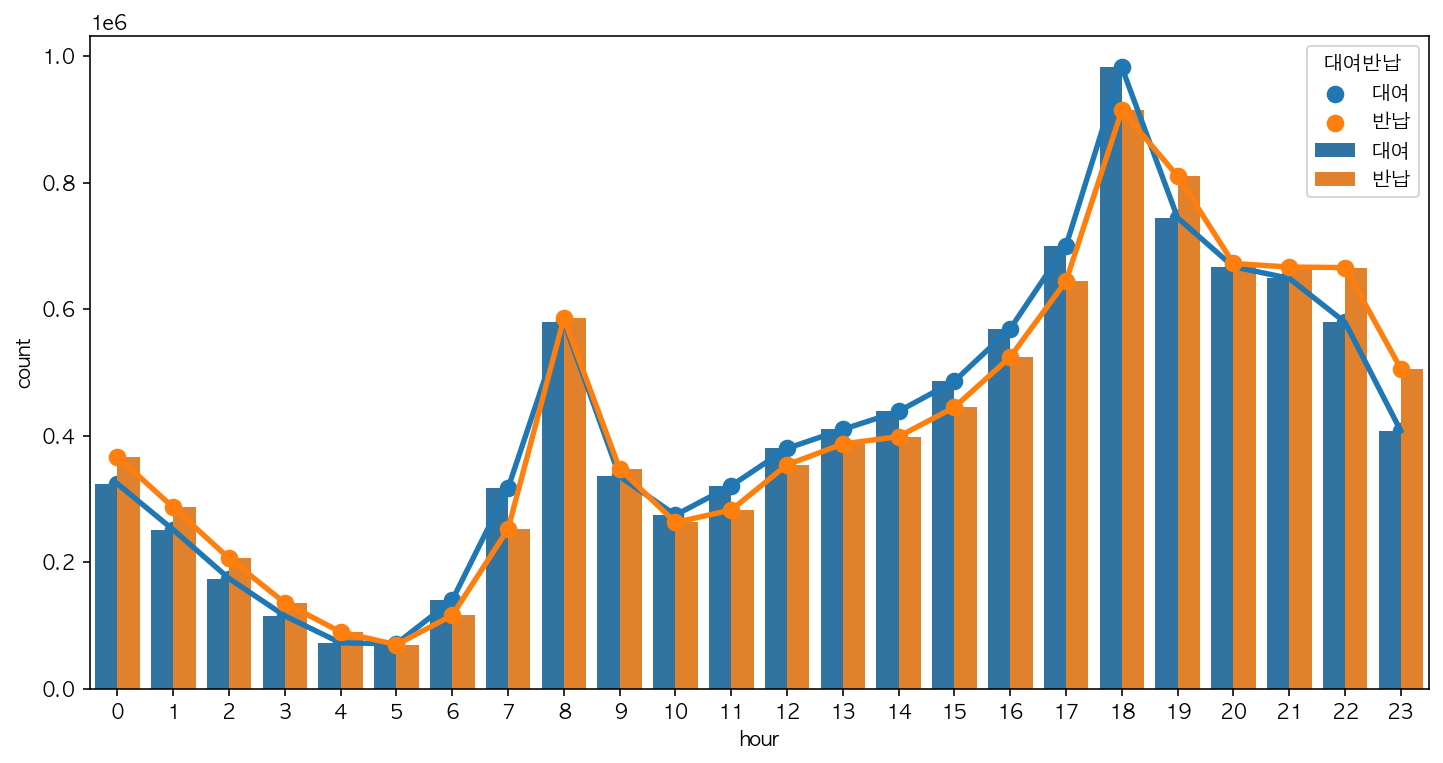

In [51]:
plt.figure(figsize=(12,6))
sns.pointplot(data=df_hour, x="hour", y="count", hue="대여반납")
sns.barplot(data=df_hour, x="hour", y="count", hue="대여반납")

* 새벽시간대로 갈 수록 대여/반납 수가 줄어든다.
* 출근시간대에는 대여가 반납보다 많다.
* 오전에는 8시대에 대여/반납이 많으며, 오후시간대에는 18시에 대여/반납이 가장 많다.
* 오전 11시부터 20시까지는 대여가 반납보다 많다.(대여>반납)
* 21시 이후부터 오전 4시까지는 대여보다 반납이 많다.(대여<반납)

In [52]:
df_minute_1 = df['대여분'].value_counts().reset_index()
df_minute_1.columns = ['minute', 'count']
df_minute_1 = df_minute_1.sort_values('minute')
df_minute_1['대여반납'] = '대여'
print(df_minute_1.shape)

df_minute_2 = df['반납분'].value_counts().reset_index()
df_minute_2.columns = ['minute', 'count']
df_minute_2 = df_minute_2.sort_values('minute')
df_minute_2['대여반납'] = '반납'
print(df_minute_2.shape)

df_minute = pd.concat([df_minute_1, df_minute_2])
print(df_minute.shape)

(60, 3)
(60, 3)
(120, 3)


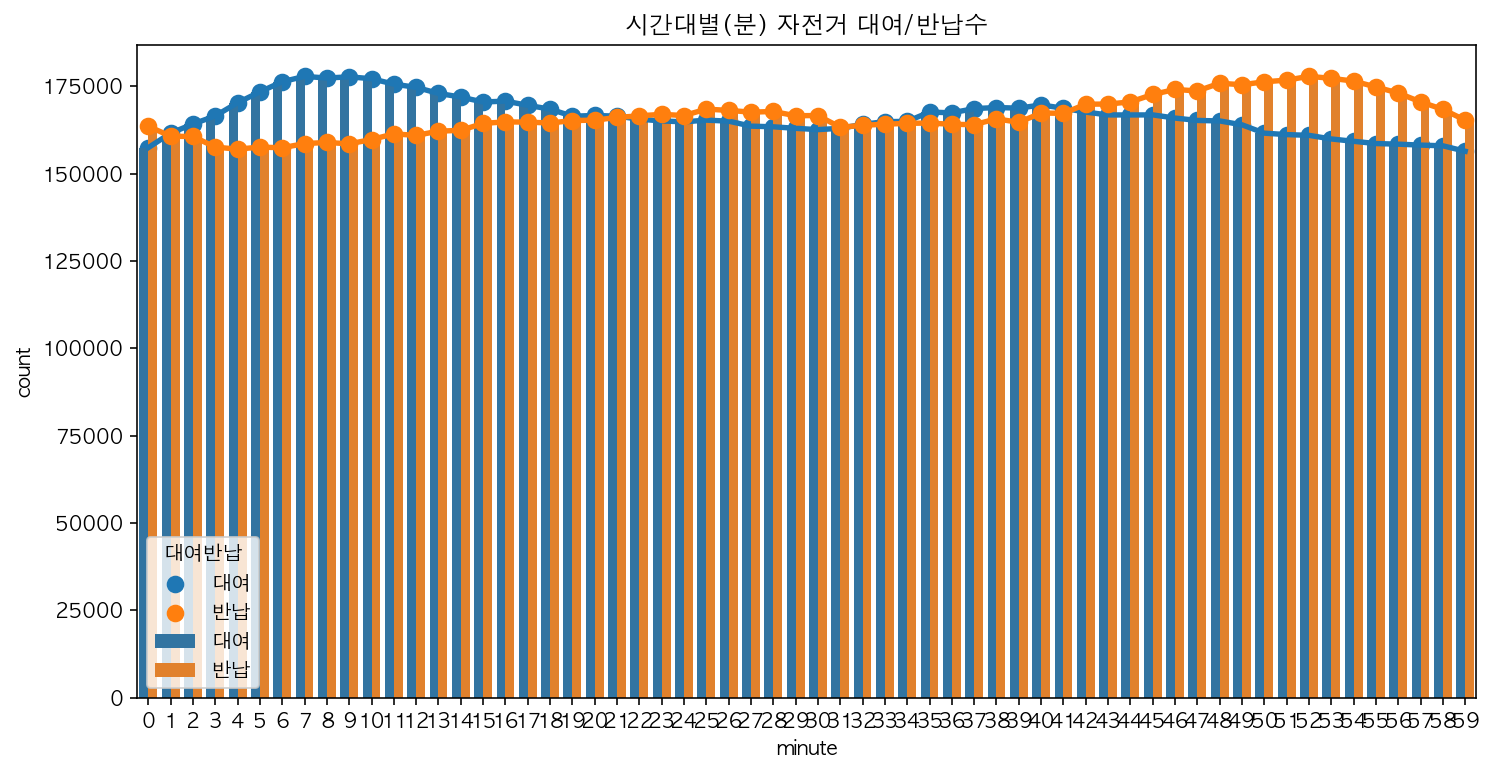

In [53]:
plt.figure(figsize=(12,6))
plt.title('시간대별(분) 자전거 대여/반납수')
sns.pointplot(data=df_minute, x="minute", y="count", hue="대여반납")
sns.barplot(data=df_minute, x="minute", y="count", hue="대여반납")

* 대여/반납이 거의 비슷하게 이루어지고 있지만 대여는 0 ~ 20분 사이에 더 많이 일어나며 반납은 40 ~ 60분 사이에 더 많이 일어난다.

## 대여와 반납은 같은 곳에서 이루어지고 있을까?

In [54]:
# 같은대여반납소라는 컬럼을 새로 만들고 대여반납이 같은 곳에서 이루어지고 있는지 여부를 추가한다.
df['같은대여반납소'] = df['대여대여소명'] == df['반납대여소명']

In [55]:
df_location_diff = df['같은대여반납소'].value_counts().reset_index()
df_location_diff.columns = ['일치여부', '대여반납수']
# 같은|다른 반납소별로 대여반납수가 몇 배나 차이가 나는지 확인한다.
location_diff_ratio = df_location_diff['대여반납수'][0]/df_location_diff['대여반납수'][1]
print(f'같은 곳에서 대여반납 하는 것보다 다른 곳에서 대여반납 하는 것이 {location_diff_ratio:.2f}배 많다.')
df_location_diff

같은 곳에서 대여반납 하는 것보다 다른 곳에서 대여반납 하는 것이 8.52배 많다.


,일치여부,대여반납수
0,False,8939307
1,True,1048781


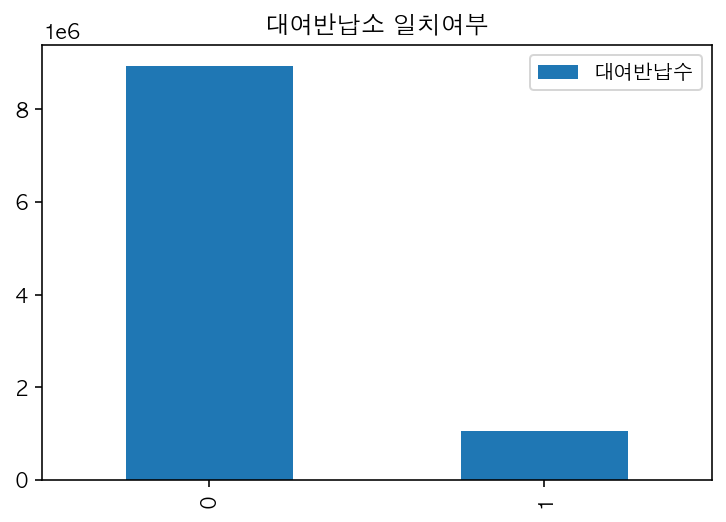

In [56]:
df_location_diff.plot.bar(title="대여반납소 일치여부")

같은 곳에서 대여반납을 하는 것보다 다른 곳으로의 대여반납이 훨씬 많은 것을 확인할 수 있다.

In [57]:
df_same_loc = df.loc[df['같은대여반납소'] == True]
df_same_loc.head()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),...,대여시,대여분,대여요일,반납년,반납월,반납일,반납시,반납분,반납요일,같은대여반납소
0,SPB-02041,2018-01-01 00:00:10,227,양평2나들목 보행통로 입구,9,2018-01-01 00:04:03,227,양평2나들목 보행통로 입구,9,3,...,0,0,0,2018,1,1,0,4,0,True
26,SPB-03273,2018-01-01 00:08:54,152,마포구민체육센터 앞,1,2018-01-01 00:27:14,152,마포구민체육센터 앞,1,18,...,0,8,0,2018,1,1,0,27,0,True
140,SPB-10667,2018-01-01 00:37:45,315,신한은행 안국역지점 옆,2,2018-01-01 00:40:05,315,신한은행 안국역지점 옆,2,2,...,0,37,0,2018,1,1,0,40,0,True
142,SPB-00296,2018-01-01 00:38:31,1211,방이삼거리,1,2018-01-01 00:41:19,1211,방이삼거리,1,2,...,0,38,0,2018,1,1,0,41,0,True
160,SPB-03993,2018-01-01 00:41:53,1231,잠실역 6번출구,4,2018-01-01 00:50:58,1231,잠실역 6번출구,3,8,...,0,41,0,2018,1,1,0,50,0,True


In [58]:
# 같은 곳에서 대여반납이 이루어지는 상위 대여소(대여|반납 건 수)
df_same_loc['대여대여소명'].value_counts().head(30)

여의나루역 1번출구 앞                10380
 여의나루역 1번출구 앞                9568
뚝섬유원지역 1번출구 앞                9138
 뚝섬유원지역 1번출구 앞               7174
서울숲 관리사무소                    5689
마포구민체육센터 앞                   5033
고속터미널역 8-1번, 8-2번 출구 사이      4778
몽촌토성역 1번출구 옆                 4330
봉림교 교통섬                      4075
옥수역 3번출구                     3806
월드컵공원                        3518
 마포구민체육센터 앞                  3313
 고속터미널역 8-1번, 8-2번 출구 사이     3235
CJ 드림시티                      3207
노들역 1번출구                     3170
 월드컵공원                       3151
당산육갑문                        3107
 봉림교 교통섬                     3014
흑석역 1번출구                     2892
 서울숲 관리사무소                   2884
현대고등학교 건너편                   2790
한신16차아파트 119동 앞              2705
청계천 생태교실 앞                   2704
 옥수역 3번출구                    2565
잠실새내역 5번 출구 뒤                2559
 서울숲역 4번 출구 옆                2535
보문2교                         2395
건국대학교 (입학정보관)                2328
양천향교역 7번출구앞                  2312
아크로리버뷰 부지 앞   

* 같은 곳에서 대여반납이 이루어지는 대여소들은 한강주변이나 공원 주변에 위치한 것을 확인해 볼 수 있다.

## 같은|다른 대여소에서 대여가 되는 자전거의 평균 이용시간
### 같은 대여반납소

In [59]:
same_loc_mean_time = df_same_loc['이용시간(분)'].mean()
print('같은곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 : ', same_loc_mean_time)
df_same_mean = df_same_loc.groupby(['대여대여소명', '대여대여소번호', '반납대여소명'])['이용시간(분)'].mean().reset_index()
df_same_count = df_same_loc.groupby(['대여대여소명', '대여대여소번호', '반납대여소명']).size().reset_index()
df_same_count.columns = ['대여대여소명', '대여대여소번호', '반납대여소명', '이용횟수']
df_same_loc2 = df_same_mean.merge(df_same_count, left_on=['대여대여소명', '대여대여소번호', '반납대여소명'], 
                                  right_on=['대여대여소명', '대여대여소번호', '반납대여소명'])
df_same_loc2.sort_values(by='이용시간(분)', ascending=False).head(10)

같은곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 :  53.52995143886093


,대여대여소명,대여대여소번호,반납대여소명,이용시간(분),이용횟수
2076,서원마을,3539,서원마을,99.000000,1
2351,영등포 푸르지오 아파트,279,영등포 푸르지오 아파트,86.731003,658
2414,우리은행 금호동 지점 앞,533,우리은행 금호동 지점 앞,82.727273,143
1887,복정역 2번출구 후문 (장지치안센터),2607,복정역 2번출구 후문 (장지치안센터),81.714286,7
2091,석수역1번출구 앞 (SK주유소),1858,석수역1번출구 앞 (SK주유소),79.736842,19
1353,강일동 에너지 마루,1040,강일동 에너지 마루,79.541667,24
219,금호사거리,534,금호사거리,79.328205,195
213,금원빌딩 앞,2313,금원빌딩 앞,78.857143,182
1305,가락삼환아파트 앞,2617,가락삼환아파트 앞,78.750000,16
386,롯데하이마트 (상암월드컵점),424,롯데하이마트 (상암월드컵점),78.675676,37


In [60]:
# 이용횟수가 많은 곳의 평균 이용시간
df_same_loc2.sort_values(by='이용횟수', ascending=False).head(10)

,대여대여소명,대여대여소번호,반납대여소명,이용시간(분),이용횟수
2312,여의나루역 1번출구 앞,207,여의나루역 1번출구 앞,67.728131,10380
854,여의나루역 1번출구 앞,207,여의나루역 1번출구 앞,67.884511,9568
1696,뚝섬유원지역 1번출구 앞,502,뚝섬유원지역 1번출구 앞,59.579777,9138
371,뚝섬유원지역 1번출구 앞,502,뚝섬유원지역 1번출구 앞,59.409256,7174
2040,서울숲 관리사무소,3515,서울숲 관리사무소,57.614343,5689
1746,마포구민체육센터 앞,152,마포구민체육센터 앞,59.177230,5033
1395,"고속터미널역 8-1번, 8-2번 출구 사이",2219,"고속터미널역 8-1번, 8-2번 출구 사이",76.086856,4778
1797,몽촌토성역 1번출구 옆,1268,몽촌토성역 1번출구 옆,56.860277,4330
1889,봉림교 교통섬,2102,봉림교 교통섬,57.104294,4075
2381,옥수역 3번출구,565,옥수역 3번출구,60.642407,3806


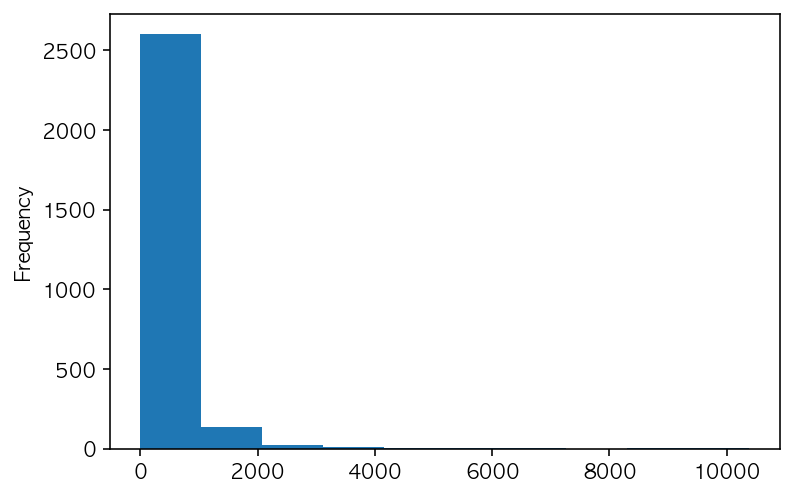

In [61]:
df_same_loc2['이용횟수'].plot.hist()

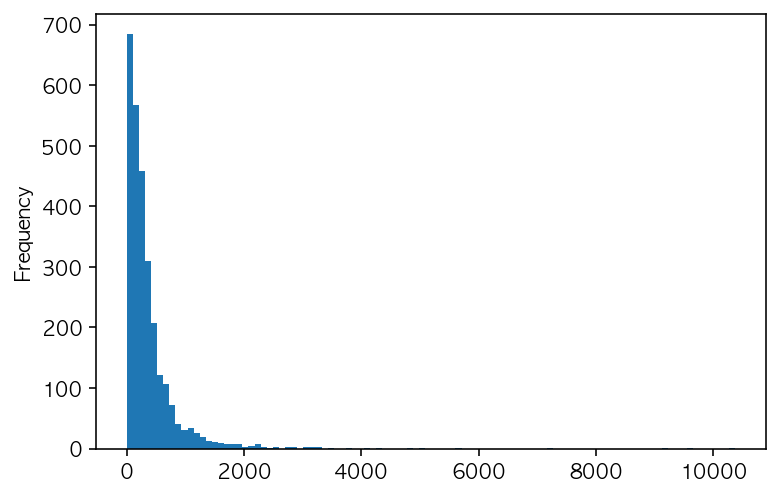

In [62]:
df_same_loc2['이용횟수'].plot.hist(bins=100)

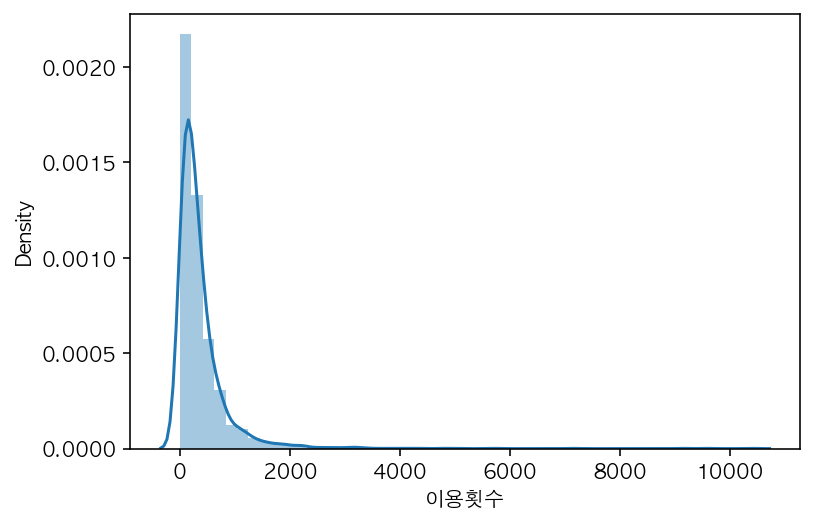

In [63]:
sns.distplot(df_same_loc2['이용횟수'])

### 다른 대여|반납소

In [64]:
df_diff_loc = df.loc[df['같은대여반납소'] == False]
df_diff_loc.shape

(8939307, 26)

In [65]:
diff_loc_mean_time = df_diff_loc['이용시간(분)'].mean()
print('다른곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 : ', df_diff_loc['이용시간(분)'].mean())

df_diff_mean = df_diff_loc.groupby(
    ['대여대여소명', '반납대여소명'])['이용시간(분)'].mean().reset_index()
df_diff_count = df_diff_loc.groupby(
    ['대여대여소명', '반납대여소명']).size().reset_index()

df_diff_count.columns = ['대여대여소명', '반납대여소명', '이용횟수']
df_diff_loc2 = df_diff_mean.merge(df_diff_count, 
                                  left_on=['대여대여소명', '반납대여소명'], 
                                  right_on=['대여대여소명', '반납대여소명'])
df_diff_loc2.sort_values(by='이용시간(분)', ascending=False).head(10)

다른곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 :  24.40149320299661


,대여대여소명,반납대여소명,이용시간(분),이용횟수
411803,세종대학교,동원사거리,1243.000000,1
247733,가재울 뉴타운 주유소 옆,연희초등학교 앞,1102.000000,1
122172,서초4동주민센터,도곡1동 주민센터 교차로,1002.333333,3
263498,공덕역 8번출구,JK장평타워,807.000000,1
164069,영등포역지하쇼핑센타 5번출구,장승배기역2번출구뒷편쪽,785.750000,4
226135,홍대입구역 8번출구 앞,동대문역사문화공원역 9번출구 앞,767.000000,1
501143,제일빌딩 앞,반포본동 주민센터 앞,757.000000,1
203488,천왕역 4번출구 뒤,신정3동 현장민원실 앞,740.000000,1
469605,용강동 주민센터 앞,흑석역 4번출구,728.000000,1
214191,하계동 중평어린이공원 앞,장위뉴타운 꿈에 숲 코오롱 하늘채 앞,672.000000,1


In [66]:
df_diff_loc2.sort_values(by='이용횟수', ascending=False).head(10)

,대여대여소명,반납대여소명,이용시간(분),이용횟수
532263,하늘채코오롱아파트 건너편,홍대입구역 2번출구 앞,9.241627,4867
255546,건국대학교 (입학정보관),건국대학교 학생회관,9.005985,4010
546550,홍대입구역 2번출구 앞,하늘채코오롱아파트 건너편,13.911557,3686
256276,건국대학교 학생회관,건국대학교 (입학정보관),11.269931,3186
490061,자양나들목,뚝섬유원지역 1번출구 앞,8.650940,3137
214837,하늘채코오롱아파트 건너편,홍대입구역 2번출구 앞,8.577323,3078
353132,방이삼거리,롯데월드타워(잠실역2번출구 쪽),10.064668,2969
494622,장승배기역 5번출구,노량진역 5번출구,7.152679,2967
326877,롯데월드타워(잠실역2번출구 쪽),방이삼거리,10.588086,2753
359947,봉림교 교통섬,서울신성초등학교,19.324793,2654


In [67]:
rent_mean_time = same_loc_mean_time - diff_loc_mean_time
print(f'같은 곳에서 대여반납이 이루어지는 자전거의 이용시간(분)이 다른 대여소의 대여반납 이용시간보다 {rent_mean_time:.2f} 분 많다.')

같은 곳에서 대여반납이 이루어지는 자전거의 이용시간(분)이 다른 대여소의 대여반납 이용시간보다 29.13 분 많다.


* 이용횟수가 많은 대여소라고 해서 평균이용시간이 평균보다 높지는 않다.
* 하늘채코오롱아파트 건너편<->홍대입구역 2번출구 앞은 이용횟수가 가장 높은 대여반납소다.
* 관련기사
    * ['따릉이' 타고 가장 많이 다닌 경로는? - 통플러스](http://news.tongplus.com/site/data/html_dir/2018/10/24/2018102402585.html)
    * [[ONE SHOT] 따릉이, ‘이곳’서 가장 많이 빌리고 ‘여기’서 가장 많이 탄다](https://news.joins.com/article/23003297)

## 해당 기간동안 가장 많이 이용된 자전거는 몇 회 대여 되었을까?

In [68]:
bike_describe = df['자전거번호'].describe()
print('대여된 자전거 수 :', bike_describe[1])
print('가장 많이 대여된 자전거 번호 :', bike_describe[2])
print('가장 많이 대여된 자전거의 대여횟수 :', bike_describe[3])
bike_describe

대여된 자전거 수 : 18219
가장 많이 대여된 자전거 번호 : SPB-12694
가장 많이 대여된 자전거의 대여횟수 : 1253


count       9988088
unique        18219
top       SPB-12694
freq           1253
Name: 자전거번호, dtype: object

In [69]:
bike_rent_counts = df['자전거번호'].value_counts().reset_index()
bike_rent_counts.columns = ['자전거번호', '대여수']
print('해당 기간동안 자전거 하나당 평균 대여 수:', bike_rent_counts['대여수'].mean())
print('자전거 하나당 가장 많이 대여된 횟수:', bike_rent_counts['대여수'].max())
print('자전거 하나당 가장 적게 대여된 횟수:', bike_rent_counts['대여수'].min())

해당 기간동안 자전거 하나당 평균 대여 수: 548.223722487513
자전거 하나당 가장 많이 대여된 횟수: 1253
자전거 하나당 가장 적게 대여된 횟수: 1


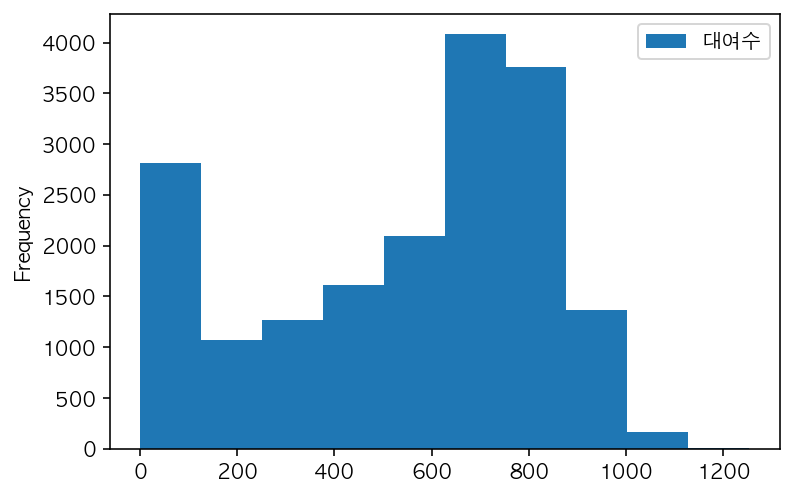

In [70]:
bike_rent_counts.plot.hist()

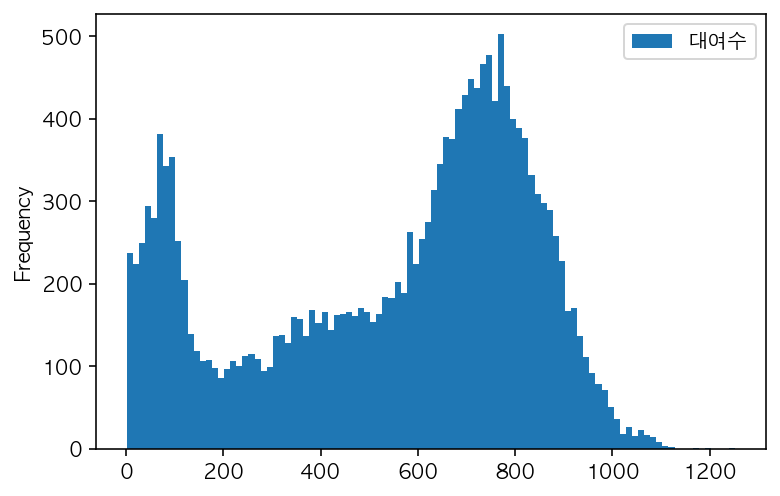

In [71]:
# bin의 갯수를 늘려서 그려본다.
bike_rent_counts.plot.hist(bins=100)

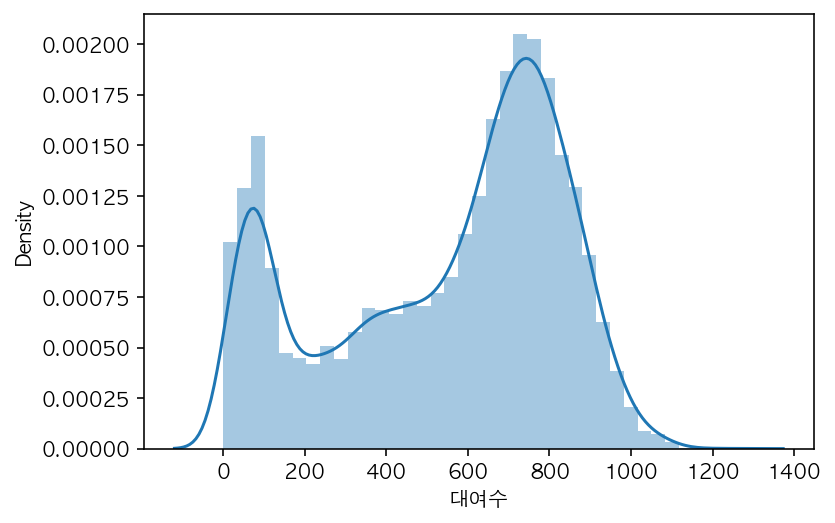

In [72]:
# 자전거 하나당 특정 기간동안 대여된 횟수
sns.distplot(bike_rent_counts["대여수"])

In [73]:
# 가장 많이 대여된 자전거의 대여이력
most_bike_df = df.loc[df['자전거번호'] == bike_describe[2]]
most_bike_df.head()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),...,대여시,대여분,대여요일,반납년,반납월,반납일,반납시,반납분,반납요일,같은대여반납소
4472,SPB-12694,2018-01-01 21:41:29,203,국회의사당역 3번출구 옆,15,2018-01-01 21:53:30,258,신길역3번출구,1,11,...,21,41,0,2018,1,1,21,53,0,False
6365,SPB-12694,2018-01-02 08:35:45,258,신길역3번출구,1,2018-01-02 08:48:16,200,국회의원회관,2,11,...,8,35,1,2018,1,2,8,48,1,False
6708,SPB-12694,2018-01-02 09:10:59,200,국회의원회관,2,2018-01-02 09:30:44,227,양평2나들목 보행통로 입구,7,18,...,9,10,1,2018,1,2,9,30,1,False
27282,SPB-12694,2018-01-05 08:10:21,244,영등포삼환아파트 앞,11,2018-01-05 08:39:23,147,마포역 4번출구 뒤,2,27,...,8,10,4,2018,1,5,8,39,4,False
31789,SPB-12694,2018-01-05 18:46:42,147,마포역 4번출구 뒤,2,2018-01-05 19:06:25,219,롯데캐슬엠파이어 옆,1,18,...,18,46,4,2018,1,5,19,6,4,False


In [74]:
most_bike_df['대여대여소명'].value_counts()

여의나루역 1번출구 앞                9
우장산역 1번출구옆(우장산아이파크105동앞)    8
 하늘채코오롱아파트 건너편              8
 외국어대 정문 앞                  7
 홍대입구역 2번출구 앞               7
                           ..
 송파파크데일 2단지입구 앞 주차장         1
대한항공 인력개발센터                 1
성수사거리 버스정류장 앞               1
KBS 스포츠월드                   1
상봉역 1번출구                    1
Name: 대여대여소명, Length: 751, dtype: int64

In [75]:
rent_station = most_bike_df['대여대여소명'].unique()
rent_station

array([' 국회의사당역 3번출구 옆', ' 신길역3번출구', ' 국회의원회관', ' 영등포삼환아파트 앞',
       ' 마포역 4번출구 뒤', ' 롯데캐슬엠파이어 옆', ' 삼부아파트1동 앞', ' 롯데캐슬 앞', ' 여의도초교 앞',
       ' 증권거래소 앞', ' 신림동 우방아파트', ' 미림여고입구 교차로', ' 동작구민 체육센터',
       ' 은평평화공원(역촌역4번출구)', ' 증산역 4번출구', ' 누리꿈스퀘어 옆', ' 상암동주민센터 옆',
       ' 상암월드컵파크 9단지 앞', ' 마포구청 앞', ' 상암월드컵파크 3단지 후문', ' 월드컵경기장역 3번출구 옆',
       ' 홈플러스 앞', ' DMC역 9번출구 앞', ' 연서어린이공원', ' 상수역 2번출구 앞', ' 옥수역 3번출구',
       ' DMC역 2번출구 옆', ' DMC산학협력연구센터 앞', ' LG CNS앞', ' 상암월드컵파크 1단지 교차로',
       ' 명지전문대학교 정문 앞', ' 홍연2교옆', ' 홍대입구역 2번출구 앞', ' 새절역 2번출구', ' 증산2교',
       ' 응암오거리', ' 북가좌 삼거리', ' SK망원동주유소 건너편', ' 명지대학교 도서관', ' 성산2교 사거리',
       ' 하늘채코오롱아파트 건너편', ' 정명학원', ' 마포구민체육센터 앞', ' 마포구청역 ', ' 망원2빗물펌프장 앞',
       ' 합정역 5번출구 앞', ' 유진투자증권빌딩 앞', ' 국민일보 앞', ' 유스호스텔 앞', ' KBS 앞',
       ' KT앞', ' 삼성생명 당산사옥 앞', ' 대림역4번출구', ' 스타벅스앞', ' 공항중학교앞',
       ' 마곡엠밸리4단지 정문', ' 신방화역환승주차장', ' 방화사거리 마을버스 버스정류장', ' 공항시장역 4번출구',
       ' 서남환경공원 버스정류장', ' 명덕고교입구(영종빌딩)', ' 방화역 4번출구앞', ' 화곡로 입구 교차로',
       ' 곰달래사거리

In [76]:
# 대여소명 앞에 들어간 공백을 제거합니다.
bike_move = []
for s in rent_station:
    bike_move.append(s.strip())
    
bike_move    

['국회의사당역 3번출구 옆',
 '신길역3번출구',
 '국회의원회관',
 '영등포삼환아파트 앞',
 '마포역 4번출구 뒤',
 '롯데캐슬엠파이어 옆',
 '삼부아파트1동 앞',
 '롯데캐슬 앞',
 '여의도초교 앞',
 '증권거래소 앞',
 '신림동 우방아파트',
 '미림여고입구 교차로',
 '동작구민 체육센터',
 '은평평화공원(역촌역4번출구)',
 '증산역 4번출구',
 '누리꿈스퀘어 옆',
 '상암동주민센터 옆',
 '상암월드컵파크 9단지 앞',
 '마포구청 앞',
 '상암월드컵파크 3단지 후문',
 '월드컵경기장역 3번출구 옆',
 '홈플러스 앞',
 'DMC역 9번출구 앞',
 '연서어린이공원',
 '상수역 2번출구 앞',
 '옥수역 3번출구',
 'DMC역 2번출구 옆',
 'DMC산학협력연구센터 앞',
 'LG CNS앞',
 '상암월드컵파크 1단지 교차로',
 '명지전문대학교 정문 앞',
 '홍연2교옆',
 '홍대입구역 2번출구 앞',
 '새절역 2번출구',
 '증산2교',
 '응암오거리',
 '북가좌 삼거리',
 'SK망원동주유소 건너편',
 '명지대학교 도서관',
 '성산2교 사거리',
 '하늘채코오롱아파트 건너편',
 '정명학원',
 '마포구민체육센터 앞',
 '마포구청역',
 '망원2빗물펌프장 앞',
 '합정역 5번출구 앞',
 '유진투자증권빌딩 앞',
 '국민일보 앞',
 '유스호스텔 앞',
 'KBS 앞',
 'KT앞',
 '삼성생명 당산사옥 앞',
 '대림역4번출구',
 '스타벅스앞',
 '공항중학교앞',
 '마곡엠밸리4단지 정문',
 '신방화역환승주차장',
 '방화사거리 마을버스 버스정류장',
 '공항시장역 4번출구',
 '서남환경공원 버스정류장',
 '명덕고교입구(영종빌딩)',
 '방화역 4번출구앞',
 '화곡로 입구 교차로',
 '곰달래사거리',
 '화곡역(에이스정형외과앞) 버스정류장',
 '신정6동 주민센터 인근',
 '홍익병원앞 교차로',
 '목동2단지 상가',
 '등촌역 1번출구옆',
 '발산역 6번출구옆(다이소앞)',
 

In [77]:
stations = pd.read_csv('data/seoul_bike_station.csv')
stations.shape

FileNotFoundError: [Errno 2] File data/seoul_bike_station.csv does not exist: 'data/seoul_bike_station.csv'

In [ ]:
bike_move_df = pd.DataFrame(bike_move)
bike_move_df.columns = ['대여소']
print(bike_move_df.shape)
bike_move_df.head()

In [ ]:
bike_move_df = bike_move_df.merge(stations, left_on='대여소', right_on='대여소', how='left')
bike_move_df.shape

In [ ]:
bike_move_df.head()

In [ ]:
bike_move_df.isnull().sum()

## 가장 많이 대여된 자전거가 거쳐간 대여소

In [ ]:
# 정보가 없는 대여소, 위경도를 주소정보 등으로 다시 가져올 필요가 있다.
bike_move_df.loc[bike_move_df['경도'].isnull()]

In [ ]:
# 지도 표현을 위해 folium 을 import 한다.
# 데이터 프레임에서 위도와 경도의 평균값을 구한다. 이 값으로 지도의 중심이 될 좌표를 정한다.
# zoom_start는 지도를 얼마나 확대해서 볼것인지다.
# tiles는 지도의 스타일이다.
import folium 

geo_df = bike_move_df
map = folium.Map(
    location=[geo_df['위도'].mean(), geo_df['경도'].mean()], 
    zoom_start=12, tiles='Stamen Toner')

for n in geo_df.index:
    if geo_df.loc[n, '위도'] > 0 and geo_df.loc[n, '경도'] > 0 :
        loc_name = geo_df.loc[n, '대여소']

        icon_color = 'red'
        # Circle 이 그려지지 않는다면 Circle => Marker 로 변경해서 그려보세요.
        folium.Circle(
            location=[geo_df.loc[n, '위도'], geo_df.loc[n, '경도']],
            popup=loc_name,
            radius=50,
            color=icon_color,
            fill=True,
            fill_color=icon_color
        ).add_to(map)
    
map